In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from models import BinaryLogisticRegression

Iteration 0, Loss: 0.6931471805599453
Iteration 50, Loss: 0.333620970517592
Iteration 100, Loss: 0.251214851257539
Iteration 150, Loss: 0.21148424671378785
Iteration 200, Loss: 0.18723765883947815
Iteration 250, Loss: 0.17062677749019417
Iteration 300, Loss: 0.15842220277266097
Iteration 350, Loss: 0.14901549237462072
Iteration 400, Loss: 0.1415055752508488
Iteration 450, Loss: 0.13534553111878941
Iteration 500, Loss: 0.13018314262573052
Iteration 550, Loss: 0.12578084526941335
Iteration 600, Loss: 0.12197229674137143
Iteration 650, Loss: 0.11863735633220941
Iteration 700, Loss: 0.11568695381280325
Iteration 750, Loss: 0.11305356162482871
Iteration 800, Loss: 0.1106849858004855
Iteration 850, Loss: 0.10854019804992847
Iteration 900, Loss: 0.106586464848928
Iteration 950, Loss: 0.10479732448965072
Sklearn accuracy: 0.965
Model Test accuracy: 0.965


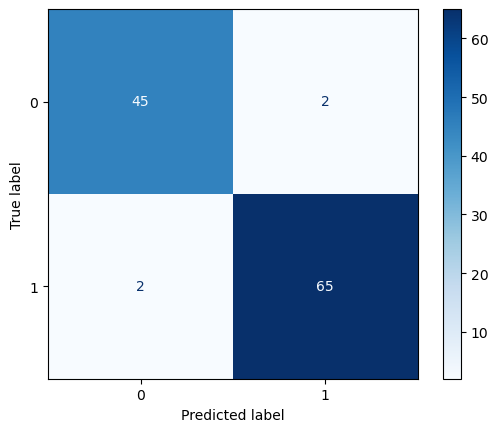

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

BLR = BinaryLogisticRegression(learning_rate=0.01, iterations=1000, verbose = True)
BLR.fit(X_train, y_train)
predictions = BLR.predict(X_test)

print("Sklearn accuracy: {:.3f}".format(accuracy_score(y_test, predictions)))
print("Model Test accuracy: {0:.3f}".format(BLR.accuracy(predictions,y_test)))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm);
disp.plot(cmap='Blues')

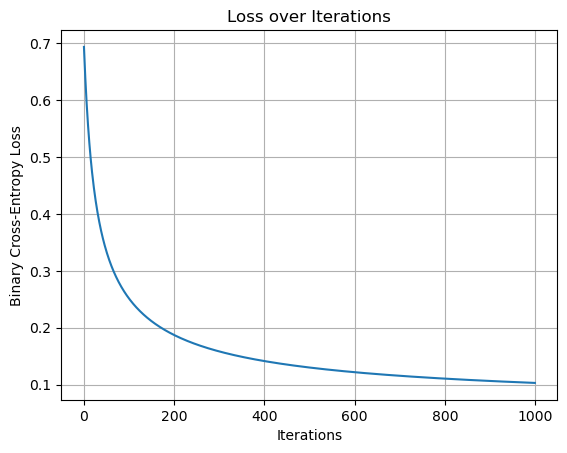

In [4]:
plt.plot(BLR.loss_history)
plt.title("Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)

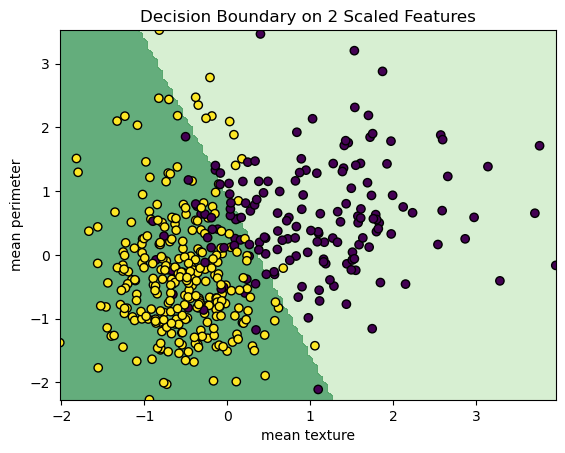

In [5]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

feature_names = dataset.feature_names.tolist()

X_2 = X[:, 0:2]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=0)

scaler2 = StandardScaler()
X_train_2 = scaler2.fit_transform(X_train_2)
X_test_2 = scaler2.transform(X_test_2)

BLR_2 = BinaryLogisticRegression(learning_rate=0.01, iterations=1000)
BLR_2.fit(X_train_2, y_train_2)

X_set, y_set = X_train_2, y_train_2
X1, X2 = np.meshgrid(
    np.linspace(X_set[:, 0].min(), X_set[:, 0].max(), 100),
    np.linspace(X_set[:, 1].min(), X_set[:, 1].max(), 100)
)

Z = BLR_2.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, cmap='Greens', alpha=0.7)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolors='k')
plt.title("Decision Boundary on 2 Scaled Features")
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.show()

